# import libraries¶


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

plt.style.use('ggplot')


# load dataset¶


In [89]:
df_train=pd.read_csv('dataset/census.csv')



# exploring data¶


In [90]:
df_train.shape


(45222, 14)

In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [92]:
df_train.head(10)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


# cleaning data¶


In [93]:
# check no. fo nulls in columns
df_train.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [94]:
df_train.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [95]:
# find the correlation between coumns
corr_abs = df_train.corr().abs().stack().sort_values(ascending=False)
corr_abs

hours-per-week  hours-per-week    1.000000
capital-loss    capital-loss      1.000000
education-num   education-num     1.000000
capital-gain    capital-gain      1.000000
age             age               1.000000
hours-per-week  education-num     0.146206
education-num   hours-per-week    0.146206
capital-gain    education-num     0.126907
education-num   capital-gain      0.126907
age             hours-per-week    0.101992
hours-per-week  age               0.101992
capital-gain    hours-per-week    0.083880
hours-per-week  capital-gain      0.083880
education-num   capital-loss      0.081711
capital-loss    education-num     0.081711
age             capital-gain      0.079683
capital-gain    age               0.079683
capital-loss    age               0.059351
age             capital-loss      0.059351
hours-per-week  capital-loss      0.054195
capital-loss    hours-per-week    0.054195
education-num   age               0.037623
age             education-num     0.037623
capital-gai

In [96]:
#drop some columns
drop_col = ['age','education_level', 'education-num','relationship', 'race', 'sex','hours-per-week', 'native-country']

df_train=df_train.drop(drop_col, axis=1)


In [97]:
#remove columns dashes
df_train.columns=df_train.columns.str.replace('-','')
df_train.head()

,workclass,maritalstatus,occupation,capitalgain,capitalloss,income
0,State-gov,Never-married,Adm-clerical,2174.0,0.0,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,0.0,0.0,<=50K
2,Private,Divorced,Handlers-cleaners,0.0,0.0,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,0.0,0.0,<=50K
4,Private,Married-civ-spouse,Prof-specialty,0.0,0.0,<=50K


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF134F3898>,
      dtype=object)

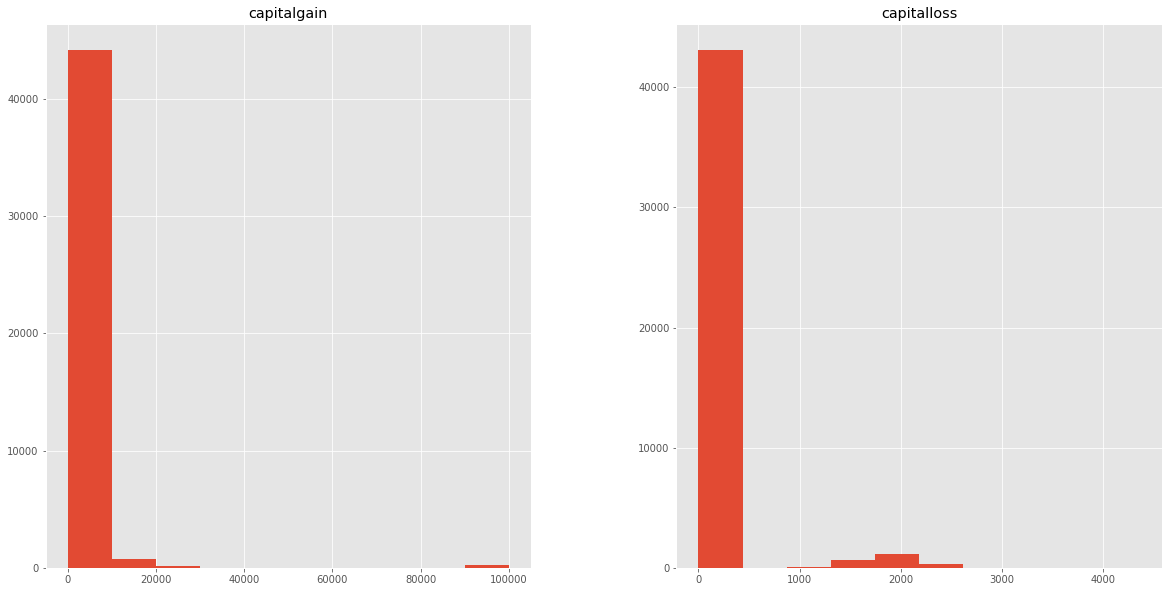

In [98]:
df_train.hist(figsize=(20,10))

## Handling Categorical Data 
### Label Encoder

In [102]:
lbl_encoder = LabelEncoder()
df_train['workclass'] = lbl_encoder.fit_transform(df_train['workclass'])
df_train['maritalstatus'] = lbl_encoder.fit_transform(df_train['maritalstatus'])
df_train['occupation'] = lbl_encoder.fit_transform(df_train['occupation'])
df_train['income'] = lbl_encoder.fit_transform(df_train['income'])

In [103]:
df_train.head()

,workclass,maritalstatus,occupation,capitalgain,capitalloss,income
0,5,4,0,2174.0,0.0,0
1,4,2,3,0.0,0.0,0
2,2,0,5,0.0,0.0,0
3,2,2,5,0.0,0.0,0
4,2,2,9,0.0,0.0,0


In [ ]:
# replace 0 with 1 and 1 with 0

In [104]:
df_train['income'] =df_train['income'].apply({0:1, 1:0}.get)


In [105]:
df_train.head()

,workclass,maritalstatus,occupation,capitalgain,capitalloss,income
0,5,4,0,2174.0,0.0,1
1,4,2,3,0.0,0.0,1
2,2,0,5,0.0,0.0,1
3,2,2,5,0.0,0.0,1
4,2,2,9,0.0,0.0,1


In [106]:
df_train['income'].value_counts()

1    34014
0    11208
Name: income, dtype: int64

In [ ]:
# split into features and goal columns

In [107]:
features = df_train.iloc[:,1:-1].values
goal = df_train.iloc[:,-1].values
features

array([[4.000e+00, 0.000e+00, 2.174e+03, 0.000e+00],
       [2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [2.000e+00, 9.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 5.455e+03, 0.000e+00],
       [2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00]])

## one-hot-encoder

In [108]:
workclass_dummies = pd.get_dummies(df_train['workclass'])

maritalstatus_dummies = pd.get_dummies(df_train['maritalstatus'])
occupation_dummies = pd.get_dummies(df_train['occupation'])


In [109]:
#add all the new columns to our dataset
df_train = pd.concat([df_train,workclass_dummies,maritalstatus_dummies,occupation_dummies],axis=1)


In [21]:
df_train.head(10)

,workclass,maritalstatus,occupation,capitalgain,capitalloss,income,0,1,2,3,...,4,5,6,7,8,9,10,11,12,13
0,5,4,0,2174.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2,3,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,5,0.0,0.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,2,2,5,0.0,0.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2,2,9,0.0,0.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,2,2,3,0.0,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2,3,7,0.0,0.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,4,2,3,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,4,9,14084.0,0.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,2,2,3,5178.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Standerdize the data


In [110]:
# standrize the values
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [111]:
features

array([[ 0.94293603, -1.48262433,  0.14288836, -0.21878026],
       [-0.3900051 , -0.7375336 , -0.1467332 , -0.21878026],
       [-1.72294622, -0.24080645, -0.1467332 , -0.21878026],
       ...,
       [-0.3900051 ,  0.75264785, -0.1467332 , -0.21878026],
       [-1.72294622, -1.48262433,  0.57998513, -0.21878026],
       [-0.3900051 , -0.7375336 , -0.1467332 , -0.21878026]])

# split into train and test


In [112]:

X_train, X_test, y_train, y_test = train_test_split(features, goal, test_size=0.20)


#  build our model

In [113]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X_train, y_train)

# accuracy for training

In [114]:

accuracy = clf.score(X_train, y_train)
print (accuracy*100)

85.35810045056252


# accuracy for testing

In [115]:
accuracy = clf.score(X_test, y_test)
print (accuracy*100)

85.29574350469873


# Training classification report and confusion_matrix

In [116]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ypredict = clf.predict(X_train)
print  (classification_report(y_train, ypredict))

             precision    recall  f1-score   support

          0       0.75      0.60      0.67      8950
          1       0.88      0.94      0.91     27227

avg / total       0.85      0.85      0.85     36177



In [117]:
print (confusion_matrix(y_train, ypredict))


[[ 5411  3539]
 [ 1758 25469]]


In [118]:
df_test=pd.read_csv('dataset/test_census.csv' )

In [119]:
df_test.shape

(45222, 14)

In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
Unnamed: 0         45222 non-null int64
age                45205 non-null float64
workclass          45200 non-null object
education_level    45202 non-null object
education-num      45208 non-null float64
marital-status     45201 non-null object
occupation         45200 non-null object
relationship       45206 non-null object
race               45203 non-null object
sex                45203 non-null object
capital-gain       45207 non-null float64
capital-loss       45205 non-null float64
hours-per-week     45209 non-null float64
native-country     45206 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 4.8+ MB


In [121]:
# check no. fo nulls in columns
df_test.isnull().sum()

Unnamed: 0          0
age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64

In [122]:
df_test.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [123]:
#drop some columns
drop_col = ['Unnamed: 0','age','education_level', 'education-num','relationship', 'race', 'sex','hours-per-week', 'native-country']

df_test=df_test.drop(drop_col, axis=1)


In [124]:
#remove columns dashes
df_test.columns=df_test.columns.str.replace('-','')
df_test.head()

,workclass,maritalstatus,occupation,capitalgain,capitalloss
0,Private,Married-civ-spouse,Craft-repair,0.0,0.0
1,Private,Married-civ-spouse,Adm-clerical,0.0,0.0
2,Self-emp-not-inc,Married-civ-spouse,Other-service,0.0,0.0
3,Private,Married-civ-spouse,Sales,7298.0,0.0
4,Private,Married-civ-spouse,Machine-op-inspct,0.0,0.0


In [125]:
df_test.shape

(45222, 5)

In [126]:
df_test.head(20)

,workclass,maritalstatus,occupation,capitalgain,capitalloss
0,Private,Married-civ-spouse,Craft-repair,0.0,0.0
1,Private,Married-civ-spouse,Adm-clerical,0.0,0.0
2,Self-emp-not-inc,Married-civ-spouse,Other-service,0.0,0.0
3,Private,Married-civ-spouse,Sales,7298.0,0.0
4,Private,Married-civ-spouse,Machine-op-inspct,0.0,0.0
5,Private,Divorced,Priv-house-serv,0.0,0.0
6,Private,Married-civ-spouse,Transport-moving,0.0,0.0
7,Private,Married-civ-spouse,Craft-repair,0.0,0.0
8,Private,Never-married,Handlers-cleaners,0.0,0.0
9,Local-gov,Married-civ-spouse,Exec-managerial,0.0,0.0


In [130]:
# check no. fo nulls in columns
df_test.isnull().sum()

workclass        22
maritalstatus    21
occupation       22
capitalgain      15
capitalloss      17
dtype: int64

In [131]:
df_test['workclass']=df_test['workclass'].fillna(df_test['workclass'].mode()[0])
df_test['maritalstatus']=df_test['maritalstatus'].fillna(df_test['maritalstatus'].mode()[0])
df_test['occupation']=df_test['occupation'].fillna(df_test['occupation'].mode()[0])

df_test['capitalgain']=df_test['capitalgain'].fillna(df_test['capitalgain'].mean())
df_test['capitalloss']=df_test['capitalloss'].fillna(df_test['capitalloss'].mean())


In [132]:
# check no. fo nulls in columns
df_test.isnull().sum()

workclass        0
maritalstatus    0
occupation       0
capitalgain      0
capitalloss      0
dtype: int64

In [134]:
df_test = df_test.apply(lambda x:x.strip())


AttributeError: ("'Series' object has no attribute 'strip'", 'occurred at index workclass')

In [133]:
#Label Encoder
lbl_encoder = LabelEncoder()
df_test['workclass'] = lbl_encoder.transform(df_test['workclass'])
df_test['maritalstatus'] = lbl_encoder.transform(df_test['maritalstatus'])
df_test['occupation'] = lbl_encoder.transform(df_test['occupation'])


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.